# Look at the default data from open sanctions

In [29]:
import json
from typing import List
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = "../data/sources/OpenSanctions-Default-entities.ftm.json"

In [24]:
def clean_json(json_dict: dict) -> dict:
    properties = dict()
    for property_field in ["name", "alias", "country", "nationality", "topics", "gender"]:
        if property_field in json_dict["properties"].keys():
            properties[property_field] = json_dict["properties"][property_field]
    return {
        'id': json_dict["id"],
        'caption': json_dict["caption"],
        'schema': json_dict["schema"],
        'properties': properties,
        "datasets": json_dict["datasets"],
    }

In [25]:
def read_data(path: str) -> List[dict]:
    data = []
    with open(DATA_PATH, "r") as file:
        for line in tqdm(file):
            d = clean_json(json.loads(line.strip()))
            if d["schema"] == "Person":
                data.append(d)
    return data

In [26]:
data = read_data(DATA_PATH)

0it [00:00, ?it/s]

In [27]:
len(data)

853309

## Basic statistics

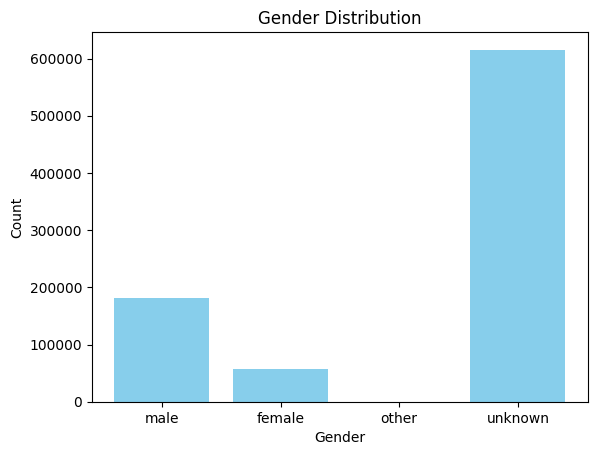

In [30]:
# genders
gender_data = [p["properties"].get("gender", ["unknown"])[0] for p in data]
# Count the occurrences
gender_counts = {gender: gender_data.count(gender) for gender in set(gender_data)}

# Extract data for plotting
genders = list(gender_counts.keys())
counts = list(gender_counts.values())

# Create a bar plot
plt.bar(genders, counts, color='skyblue')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.show()

In [31]:
# nationality
nationality_data = [p["properties"].get("nationality", p["properties"].get("country", ["unknown"]))[0] for p in data]
# Count the occurrences
nationality_counts = {nationality: nationality_data.count(nationality) for nationality in set(nationality_data)}

# Extract data for plotting
nationalities = list(nationality_counts.keys())
counts = list(nationality_counts.values())

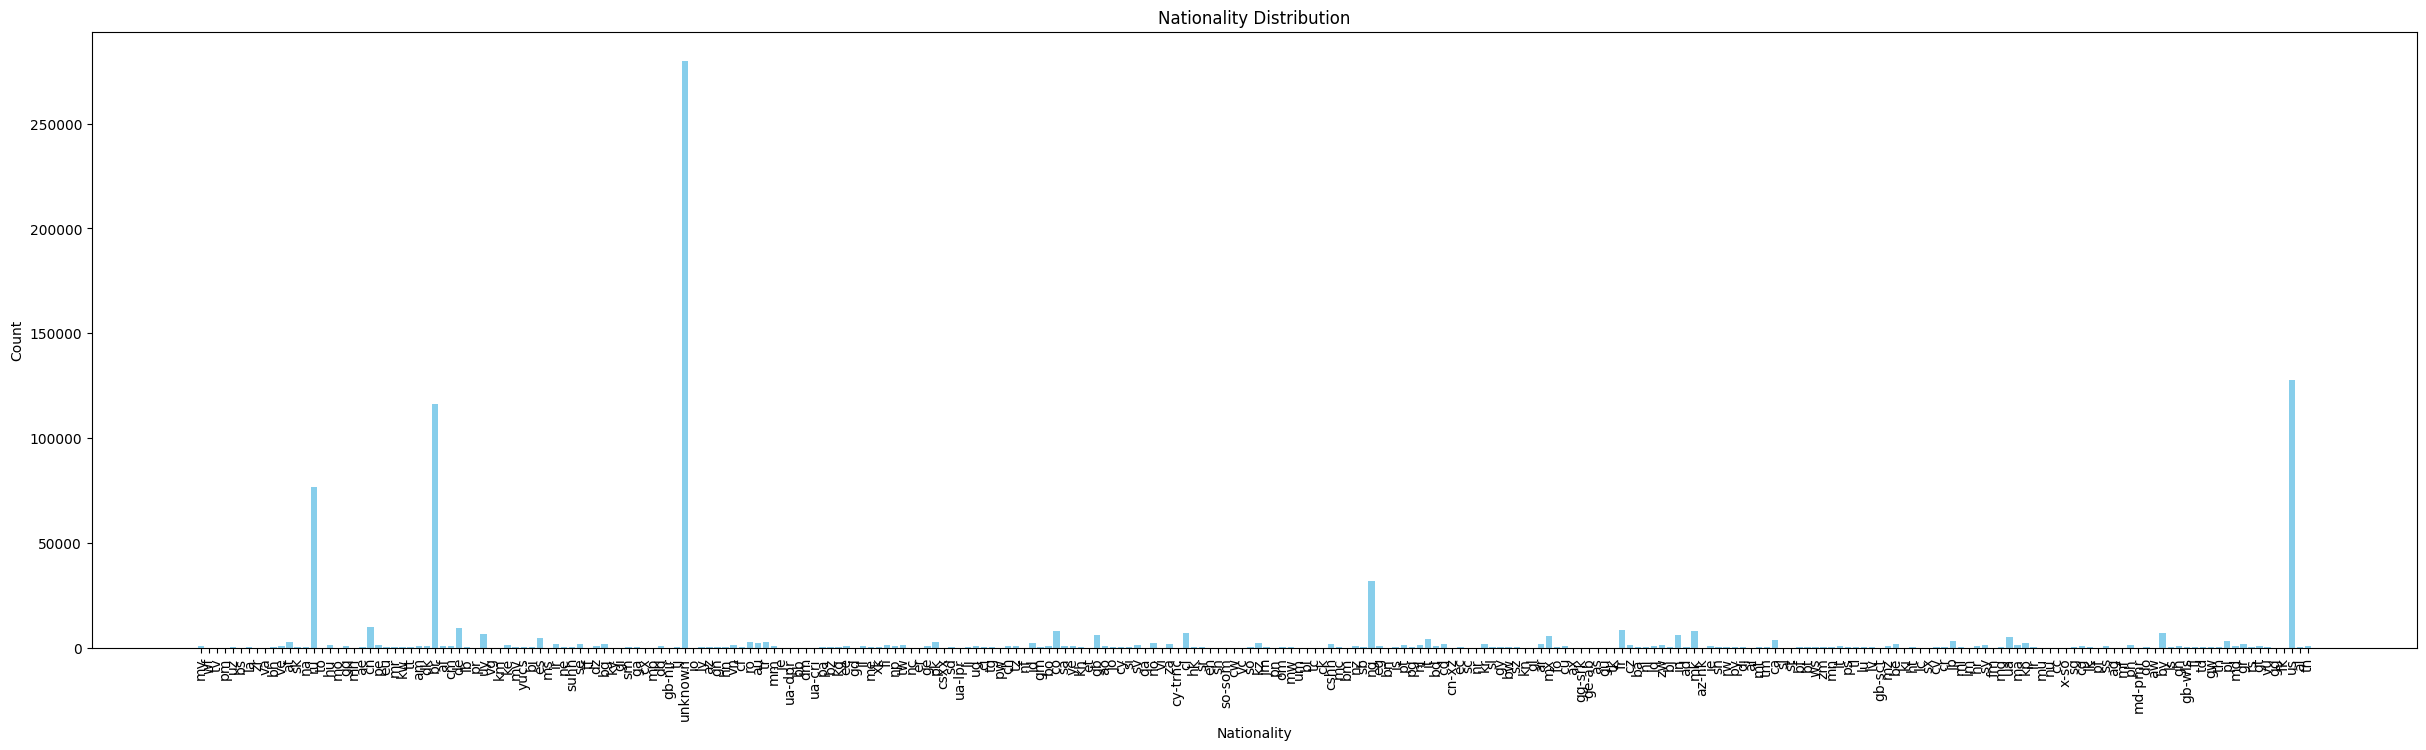

In [33]:
# Create a bar plot
plt.figure(figsize=(30, 8))
plt.bar(nationalities, counts, color='skyblue')

plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Nationality Distribution')

plt.show()

## Look at some names and aliases

In [34]:
data[343]

{'id': 'NK-37ysmjZdjAnTE47A8BwaZS',
 'caption': 'MEYER Inna Aleksandrovna',
 'schema': 'Person',
 'properties': {'name': ['Мейєр Інна Олександрівна',
   'МЕЙЄР Інна Олександрівна',
   'МЕЙЕР Инна Александровна',
   'MEYER Inna Aleksandrovna'],
  'alias': ['Meier Inna',
   'Мейер Инна Александровна',
   'Мейєр Інна Олександрівна'],
  'nationality': ['ru'],
  'topics': ['sanction']},
 'datasets': ['ua_nsdc_sanctions', 'ua_nabc_sanctions']}

In [53]:
# how many have multiple names or aliases?

multiple_names_cnt = 0
for d in data:
    if (len(d["properties"].get("name", [])) > 1) or (len(d["properties"].get("alias", [])) > 0):
        multiple_names_cnt += 1
print(multiple_names_cnt)

214463


In [54]:
multiple_names_cnt / len(data)

0.2513309949854039